In [ ]:
import pandas as pd
from google.colab import files

# Function to determine the age bracket
def get_age_bracket(age):
    if age < 18:
        return 'Child'
    elif age >= 18 and age < 40:
        return 'Adult'
    else:
        return 'Senior'

# Function to determine the gender bracket
def get_gender_bracket(gender):
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    else:
        return 'Other'

# Function to determine the physical condition bracket
def get_physical_condition_bracket(condition):
    if condition in ['Swollen Legs', 'ACL', 'Recovered Hip Girdle', 'Knee Replacement', 'Fractured Arm',
                     'Sprained Ankle', 'Back Pain', 'Shoulder Injury', 'Sprained Wrist', 'Groin Strain']:
        return 'Injury'
    else:
        return 'None'

# Function to determine the activity bracket
def get_activity_bracket(activity):
    if activity in ['Walk', 'Sport']:
        return 'Physical'
    else:
        return 'Other'

# Function to determine the BMI bracket
def get_bmi_bracket(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Function to anonymize the dataset based on the bracketing logic
def anonymize_dataset(dataset):
    anonymized_dataset = []

    for _, row in dataset.iterrows():
        age = int(row['Age'])
        gender = row['Gender']
        physical_condition = row['Physical Condition']
        activity = row['Activity']
        bmi = float(row['BMI'])
        gait_speed = float(row['Gait Speed'])
        step_length = float(row['Step Length'])
        step_width = float(row['Step Width'])
        pedometer = int(row['Pedometer'])
        accelerometer_x = float(row['Accelerometer_X'])
        accelerometer_y = float(row['Accelerometer_Y'])
        accelerometer_z = float(row['Accelerometer_Z'])
        gyroscope_x = float(row['Gyroscope_X'])
        gyroscope_y = float(row['Gyroscope_Y'])
        gyroscope_z = float(row['Gyroscope_Z'])
        location_latitude = float(row['Location_Latitude'])
        location_longitude = float(row['Location_Longitude'])
        gravity_x = float(row['Gravity_X'])
        gravity_y = float(row['Gravity_Y'])
        gravity_z = float(row['Gravity_Z'])
        falls = row['Falls']

        age_bracket = get_age_bracket(age)
        gender_bracket = get_gender_bracket(gender)
        physical_condition_bracket = get_physical_condition_bracket(physical_condition)
        activity_bracket = get_activity_bracket(activity)
        bmi_bracket = get_bmi_bracket(bmi)

        anonymized_instance = {
            'Age Bracket': age_bracket,
            'Gender Bracket': gender_bracket,
            'Physical Condition Bracket': physical_condition_bracket,
            'Activity Bracket': activity_bracket,
            'BMI Bracket': bmi_bracket,
            'Gait Speed': gait_speed,
            'Step Length': step_length,
            'Step Width': step_width,
            'Pedometer': pedometer,
            'Accelerometer_X': accelerometer_x,
            'Accelerometer_Y': accelerometer_y,
            'Accelerometer_Z': accelerometer_z,
            'Gyroscope_X': gyroscope_x,
            'Gyroscope_Y': gyroscope_y,
            'Gyroscope_Z': gyroscope_z,
            'Location_Latitude': location_latitude,
            'Location_Longitude': location_longitude,
            'Gravity_X': gravity_x,
            'Gravity_Y': gravity_y,
            'Gravity_Z': gravity_z,
            'Falls': falls
        }

        anonymized_dataset.append(anonymized_instance)

    return anonymized_dataset

# Function to convert XLSX file to CSV
def convert_xlsx_to_csv(file_path):
    data_xlsx = pd.read_excel(file_path)
    data_xlsx.to_csv('dataset.csv', index=False)

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Convert XLSX to CSV
convert_xlsx_to_csv(file_name)

# Read the dataset from the CSV file
dataset = pd.read_csv('dataset.csv')

if dataset.empty:
    print("Dataset is empty!")
else:
    anonymized_dataset = anonymize_dataset(dataset)

    # Convert the anonymized dataset to DataFrame
    output_df = pd.DataFrame(anonymized_dataset)

    # Save the output DataFrame as a CSV file
    output_df.to_csv('anonymized_dataset.csv', index=False)

    # Download the CSV file
    files.download('anonymized_dataset.csv')


Saving Dataset_Final.xlsx to Dataset_Final.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Preprocess the input data
def preprocess_data(input_data):
    # Perform any necessary preprocessing here, such as encoding categorical variables, scaling numerical features, etc.
    # Make sure the preprocessing steps match what was done during model training.
    # You can also add code to handle missing values if necessary.
    # For example, encoding categorical variables:
    label_encoder = LabelEncoder()
    for column in input_data.columns:
        if input_data[column].dtype == 'object':
            input_data[column] = label_encoder.fit_transform(input_data[column].astype(str))
    return input_data

# Function to train the model
def train_model(dataset):
    # Preprocess the dataset
    preprocessed_data = preprocess_data(dataset)

    # Select the features for training (same columns used during prediction)
    features = ['Age Bracket', 'Gender Bracket', 'Physical Condition Bracket', 'Activity Bracket', 'BMI Bracket',
                'Gait Speed', 'Step Length', 'Step Width', 'Pedometer', 'Accelerometer_X', 'Accelerometer_Y',
                'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Location_Latitude', 'Location_Longitude',
                'Gravity_X', 'Gravity_Y', 'Gravity_Z']

    X = preprocessed_data[features]
    y = preprocessed_data['Falls']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy}")

    return model

# Function to handle file upload and training
def handle_upload_and_train(file):
    # Read the uploaded file
    data = pd.read_csv(file)

    # Train the model
    model = train_model(data)

    return model

# Function to remove the 'Falls' column and make predictions
def handle_upload_and_predict(file, model):
    # Read the uploaded file
    data = pd.read_csv(file)

    # Remove the 'Falls' column from the input data
    data_for_prediction = data.drop(columns=['Falls'])

    # Preprocess the input data
    preprocessed_data = preprocess_data(data_for_prediction)

    # Make predictions using the trained model
    predictions = model.predict(preprocessed_data)

    return predictions

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Train the model using the uploaded dataset
trained_model = handle_upload_and_train(file_name)

# Upload a new dataset for prediction
uploaded_input = files.upload()

# Get the uploaded input file name
input_file_name = next(iter(uploaded_input))

# Make predictions using the trained model
predictions = handle_upload_and_predict(input_file_name, trained_model)

print("Predictions on falls:")
print(predictions)


Saving anonymized_dataset.csv to anonymized_dataset (8).csv
Model Accuracy: 1.0


Saving anonymized_dataset.csv to anonymized_dataset (9).csv
Predictions on falls:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Saving anonymized_dataset.csv to anonymized_dataset (1).csv


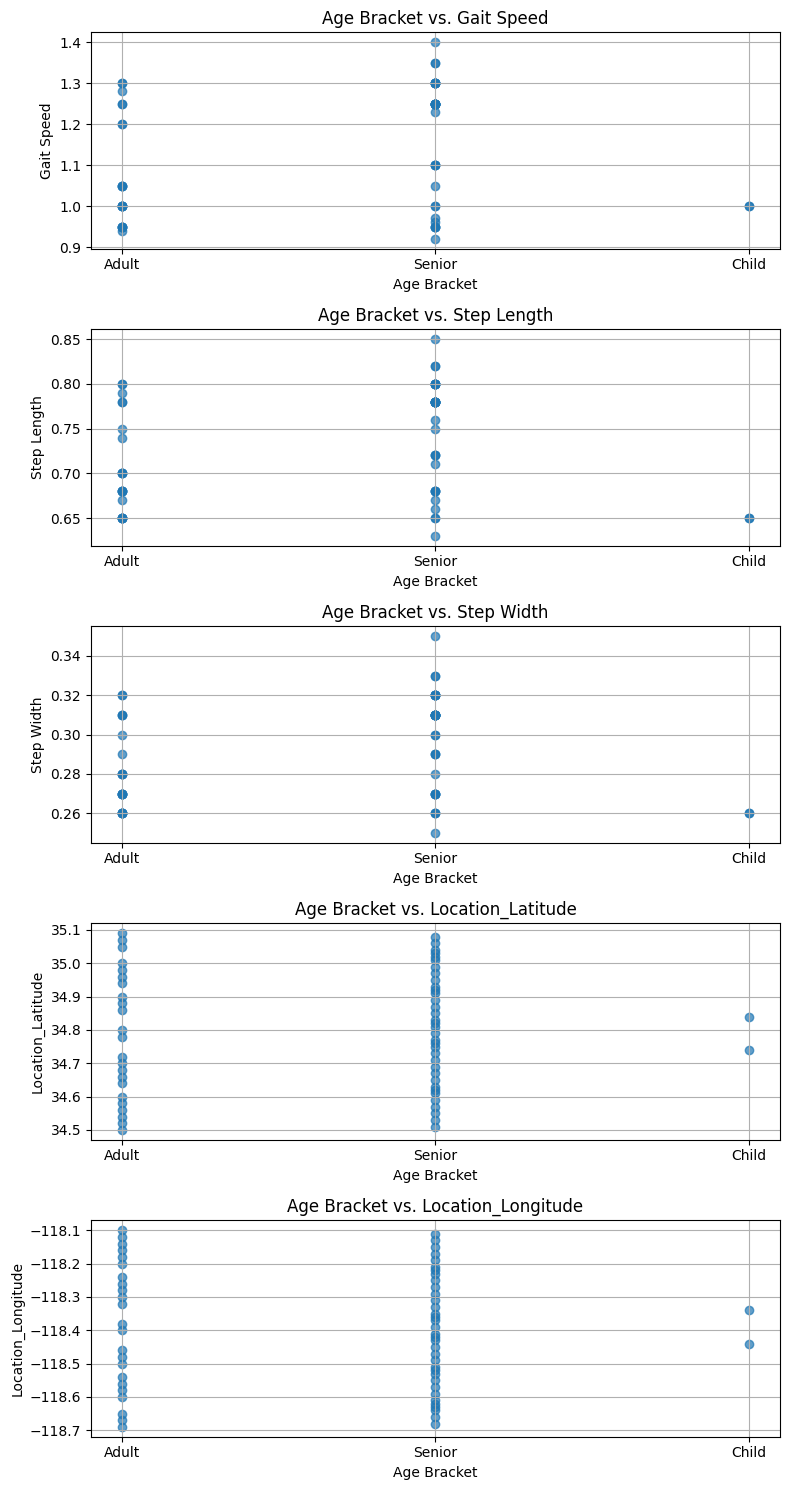

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Function to visualize the dataset
def visualize_dataset(dataset):
    # Select the features for visualization (excluding 'Age Bracket')
    features = ['Gait Speed', 'Step Length', 'Step Width', 'Location_Latitude', 'Location_Longitude']

    # Create a plot with multiple subplots
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 15))

    # Create scatter plots for each feature
    for i, feature in enumerate(features):
        axes[i].scatter(dataset['Age Bracket'], dataset[feature], marker='o', alpha=0.7)
        axes[i].set_xlabel('Age Bracket')
        axes[i].set_ylabel(feature)
        axes[i].set_title(f'Age Bracket vs. {feature}')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# Function to read the dataset from a CSV file
def read_dataset(file_path):
    dataset = pd.read_csv(file_path)
    return dataset

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Read the dataset from the uploaded CSV file
dataset = read_dataset(file_name)

if dataset.empty:
    print("Dataset is empty!")
else:
    # Visualize the dataset
    visualize_dataset(dataset)


Saving anonymized_dataset.csv to anonymized_dataset (6).csv


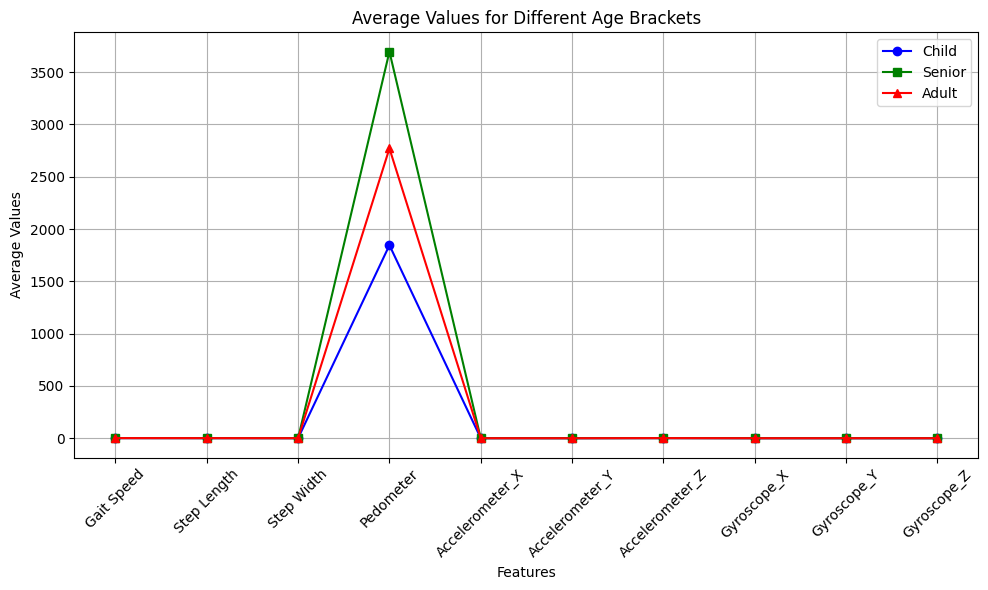

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Function to visualize the dataset
def visualize_dataset(dataset):
    # Select the features for visualization
    features = ['Gait Speed', 'Step Length', 'Step Width', 'Pedometer', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z']
    age_brackets = ['Child', 'Senior', 'Adult']
    colors = ['b', 'g', 'r']
    markers = ['o', 's', '^']

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, age_bracket in enumerate(age_brackets):
        age_data = dataset[dataset['Age Bracket'] == age_bracket]

        # Calculate the average for each feature in the age bracket
        averages = age_data[features].mean()

        # Plot the data points with clear markers
        ax.plot(averages.index, averages, c=colors[i], marker=markers[i], label=age_bracket)

    ax.set_xlabel('Features')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Different Age Brackets')
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to read the dataset from a CSV file
def read_dataset(file_path):
    dataset = pd.read_csv(file_path)
    return dataset

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Read the dataset from the uploaded CSV file
dataset = read_dataset(file_name)

if dataset.empty:
    print("Dataset is empty!")
else:
    # Visualize the dataset
    visualize_dataset(dataset)


Saving anonymized_dataset.csv to anonymized_dataset (10).csv


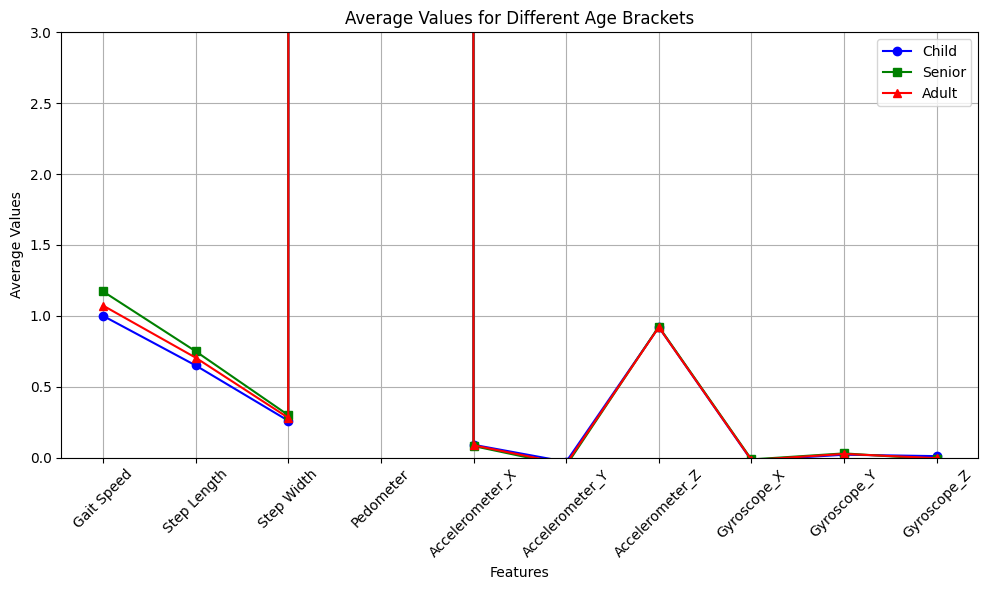

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Function to visualize the dataset
def visualize_dataset(dataset):
    # Select the features for visualization
    features = ['Gait Speed', 'Step Length', 'Step Width', 'Pedometer', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z']
    age_brackets = ['Child', 'Senior', 'Adult']
    colors = ['b', 'g', 'r']
    markers = ['o', 's', '^']

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, age_bracket in enumerate(age_brackets):
        age_data = dataset[dataset['Age Bracket'] == age_bracket]

        # Calculate the average for each feature in the age bracket
        averages = age_data[features].mean()

        # Plot the data points with clear markers
        ax.plot(averages.index, averages, c=colors[i], marker=markers[i], label=age_bracket)

    ax.set_xlabel('Features')
    ax.set_ylabel('Average Values')
    ax.set_title('Average Values for Different Age Brackets')
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)

    # Set the y-axis limits to a smaller range for better visibility
    ax.set_ylim(0, 3)  # You can adjust the limits based on the actual range of your data

    plt.tight_layout()
    plt.show()

# Function to read the dataset from a CSV file
def read_dataset(file_path):
    dataset = pd.read_csv(file_path)
    return dataset

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Read the dataset from the uploaded CSV file
dataset = read_dataset(file_name)

if dataset.empty:
    print("Dataset is empty!")
else:
    # Visualize the dataset
    visualize_dataset(dataset)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import files

# Function to preprocess the input data
def preprocess_data(input_data):
    label_encoder = LabelEncoder()
    for column in input_data.columns:
        if input_data[column].dtype == 'object':
            input_data[column] = label_encoder.fit_transform(input_data[column].astype(str))
    return input_data

# Function to train the model
def train_model(dataset):
    # Preprocess the dataset
    preprocessed_data = preprocess_data(dataset)

    # Define the features and target variable
    features = ['Age Bracket', 'Gender Bracket', 'Physical Condition Bracket', 'Activity Bracket', 'BMI Bracket',
                'Gait Speed', 'Step Length', 'Step Width', 'Pedometer', 'Accelerometer_X', 'Accelerometer_Y',
                'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Location_Latitude', 'Location_Longitude',
                'Gravity_X', 'Gravity_Y', 'Gravity_Z']
    X = preprocessed_data[features]
    y = preprocessed_data['Falls']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy}")

    return model

# Function to handle file upload and training
def handle_upload_and_train(file):
    # Read the uploaded file
    data = pd.read_csv(file)

    # Train the model
    model = train_model(data)

    return model

# Function to handle file upload and prediction
def handle_upload_and_predict(file, model):
    # Read the uploaded file
    data = pd.read_csv(file)

    # Preprocess the data
    preprocessed_data = preprocess_data(data)

    # Make predictions using the trained model
    predictions = model.predict(preprocessed_data)

    return predictions

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Train the model using the uploaded dataset
trained_model = handle_upload_and_train(file_name)

# Upload the data for prediction
uploaded_data = files.upload()

# Get the uploaded data file name
data_file_name = next(iter(uploaded_data))

# Make predictions using the trained model and uploaded data
predictions = handle_upload_and_predict(data_file_name, trained_model)

print("Predictions on falls:")
print(predictions)


Saving anonymized_dataset_FINAL.csv to anonymized_dataset_FINAL (4).csv
Model Accuracy: 0.8571428571428571


Saving Predict Dataset.csv to Predict Dataset (2).csv
Predictions on falls:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0]


Enter AI predictions (0/1) separated by spaces: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
Enter actual results (Yes/No) separated by spaces: No No No No No No No No No No No Yes No No Yes No Yes No Yes No No Yes No Yes No No No Yes Yes No No
Accuracy: 67.74%


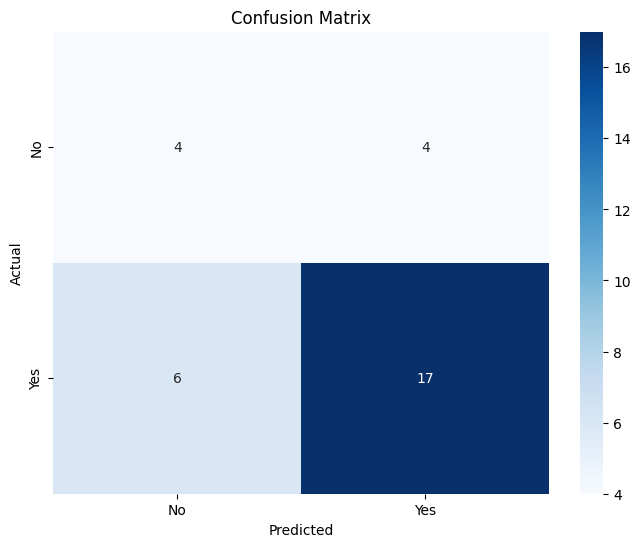

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get user inputs for AI predictions as a single string
predictions_input = input("Enter AI predictions (0/1) separated by spaces: ").strip()
predictions_numeric = [int(pred) for pred in predictions_input.split()]
predictions = ["No" if pred == 1 else "Yes" for pred in predictions_numeric]

# Get user inputs for the actual results as a single string
results_input = input("Enter actual results (Yes/No) separated by spaces: ").strip()
results = results_input.split()

# Convert "Yes" and "No" to 1 and 0 for comparison
results_numeric = [1 if res == "No" else 0 for res in results]

# Calculate accuracy
accuracy = accuracy_score(results_numeric, predictions_numeric) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Create a confusion matrix
confusion = confusion_matrix(results_numeric, predictions_numeric, labels=[0, 1])
confusion_df = pd.DataFrame(confusion, index=["No", "Yes"], columns=["No", "Yes"])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
